In [3]:
import pandas as pd
import numpy as np

In [4]:
anes = pd.read_csv('/Users/eleanorbeers/Desktop/anes_timeseries_cdf_csv_20220916/anes_timeseries_cdf_csv_20220916.csv', na_values = ' ')

/var/folders/bk/ktq9bhyd5sj0sjnh3gds09940000gn/T/ipykernel_6730/2505955600.py:1: DtypeWarning: Columns (642,644) have mixed types. Specify dtype option on import or set low_memory=False.
  anes = pd.read_csv('/Users/eleanorbeers/Desktop/anes_timeseries_cdf_csv_20220916/anes_timeseries_cdf_csv_20220916.csv', na_values = ' ')


In [5]:
anes.head()

,Version,VCF0004,VCF0006,VCF0006a,VCF0009x,VCF0010x,VCF0011x,VCF0009y,VCF0010y,VCF0011y,...,VCF9272,VCF9273,VCF9274,VCF9275,VCF9277,VCF9278,VCF9279,VCF9280,VCF9281,VCF9282
0,ANES_CDF_VERSION:2022-Sep-16,1948,1001,19481001,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANES_CDF_VERSION:2022-Sep-16,1948,1002,19481002,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANES_CDF_VERSION:2022-Sep-16,1948,1003,19481003,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANES_CDF_VERSION:2022-Sep-16,1948,1004,19481004,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANES_CDF_VERSION:2022-Sep-16,1948,1005,19481005,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
anes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68224 entries, 0 to 68223
Columns: 1030 entries, Version to VCF9282
dtypes: float64(1016), int64(11), object(3)
memory usage: 536.1+ MB


In [7]:
%pip install gitpython
%pip install gitpython

import git
repo = git.Repo(search_parent_directories=True)
config = repo.config_writer()
config.set_value("user", "name", "eleanorbeers")
config.set_value("user", "email", "eleanor.d.beers@vanderbilt.edu")
config.release()


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
print(anes['VCF0232'].dtype)
print(anes['VCF0846'].dtype)


float64
float64


In [9]:
df = anes[['VCF0004','VCF0232', 'VCF0846', 'VCF0302']]
df.head()
df.dtypes

VCF0004      int64
VCF0232    float64
VCF0846    float64
VCF0302    float64
dtype: object

In [10]:
df = df.rename(columns={'VCF0004': 'year', 'VCF0232': 'ft_lgbt', 'VCF0846': 'religion', 'VCF0302': 'party_id'})

In [11]:
df.head()

,year,ft_lgbt,religion,party_id
0,1948,NaN,NaN,NaN
1,1948,NaN,NaN,NaN
2,1948,NaN,NaN,NaN
3,1948,NaN,NaN,NaN
4,1948,NaN,NaN,NaN


In [12]:
df = df.dropna(subset=['ft_lgbt', 'religion', 'party_id'])

In [13]:
df.head()

,year,ft_lgbt,religion,party_id
27180,1984,50.0,1.0,1.0
27181,1984,40.0,1.0,2.0
27182,1984,0.0,1.0,5.0
27183,1984,15.0,1.0,5.0
27184,1984,0.0,1.0,2.0


In [14]:
unique_values = {col: df[col].unique() for col in df.columns}

print(unique_values)

{'year': array([1984, 1988, 1992, 1994, 1996, 1998, 2000, 2002, 2004, 2008, 2012,
       2016, 2020]), 'ft_lgbt': array([50., 40.,  0., 15., 25., 10., 98., 60., 30., 70., 49., 99., 97.,
        1., 20., 35., 55., 75., 90., 45., 80.,  5., 85., 32., 65.,  3.,
       51.,  2., 83., 95., 13., 47., 41.,  9., 26., 43., 48., 96.,  4.,
       79., 86., 27.,  7.,  8., 72., 56., 58., 57., 52., 92., 22., 89.,
       42., 62., 69., 74., 12., 33., 59., 68., 78., 23., 21., 94., 88.,
       87., 46., 66., 84., 38., 54., 61., 91., 82., 64., 16., 67., 71.,
       77., 76., 73., 93., 18., 19., 14., 63., 29., 31., 53., 17., 81.,
       37., 39., 24.,  6., 36., 34.]), 'religion': array([1., 2., 8., 0.]), 'party_id': array([1., 2., 5., 3., 9., 4., 8.])}


In [15]:
# cleaning religion column, dropping all rows w 8 and 0 per codebook
df = df[(df['religion'] != 0) & (df['religion'] != 8)]

In [16]:
# cleaning lgbt column
# need to code all 97 as 98.5 (97 represents all 97-100 values)
# need to drop all 98 and 99 rows

df['ft_lgbt'] = df['ft_lgbt'].replace(97, 98.5)
df = df[(df['ft_lgbt'] != 98) & (df['ft_lgbt'] != 99)]


In [17]:
# cleaning party_id column
# need to drop all 8 and 9 rows
df = df[(df['party_id'] != 8) & (df['party_id'] != 9)]

In [18]:
# need to create text dummy for religion (keep religion numeric column for regression)
# 1 = 'Religious', 2 = 'Not Religious'
df['religion_cat'] = np.where(df['religion'] == 1, 'Religious', 'Not Religious')


In [19]:
# need to create text dummy for party_id (keep religion numeric column for regression)
# 1 = 'Republican', 2 = 'Independent', 3 = 'No preference', 4 = 'Other', 5 = 'Democrat'
df['party_id_cat'] = np.where(df['party_id'] == 1, 'Republican', np.where(df['party_id'] == 2, 'Independent', np.where(df['party_id'] == 3, 'No preference', np.where(df['party_id'] == 4, 'Other', 'Democrat'))))

In [20]:
df.head()

,year,ft_lgbt,religion,party_id,religion_cat,party_id_cat
27180,1984,50.0,1.0,1.0,Religious,Republican
27181,1984,40.0,1.0,2.0,Religious,Independent
27182,1984,0.0,1.0,5.0,Religious,Democrat
27183,1984,15.0,1.0,5.0,Religious,Democrat
27184,1984,0.0,1.0,2.0,Religious,Independent


<Axes: xlabel='year'>

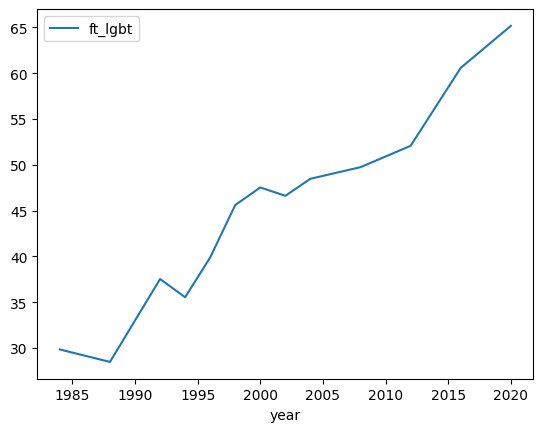

In [21]:
# create another df
# group by year
# find average ft_lgbt per year
# line graph (x = year, y = average ft_lgbt)

df2 = df.groupby('year')['ft_lgbt'].mean().reset_index()
df2.head()

df2.plot(x='year', y='ft_lgbt', kind='line')


<Axes: xlabel='year', ylabel='ft_lgbt'>

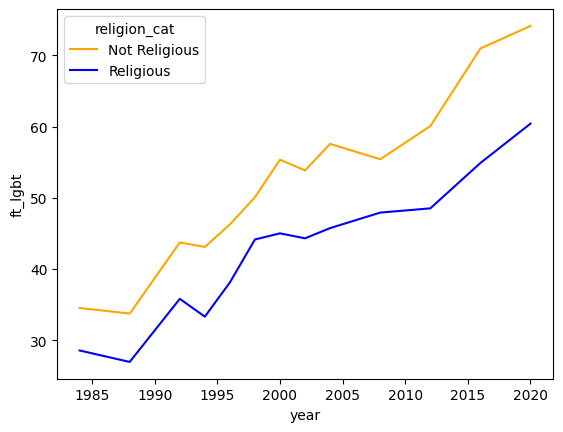

In [22]:
# now we want to break it down by religion
# plot w 2 lines (religious and not religious) - still with average ft_lgbt per year

import seaborn as sns

# define the colors for each category
colors = {'Religious': 'blue', 'Not Religious': 'orange'}

df3 = df.groupby(['year', 'religion_cat'])['ft_lgbt'].mean().reset_index()
df3.head()

sns.lineplot(x='year', y='ft_lgbt', hue='religion_cat', data=df3, palette=colors)


<Axes: xlabel='year'>

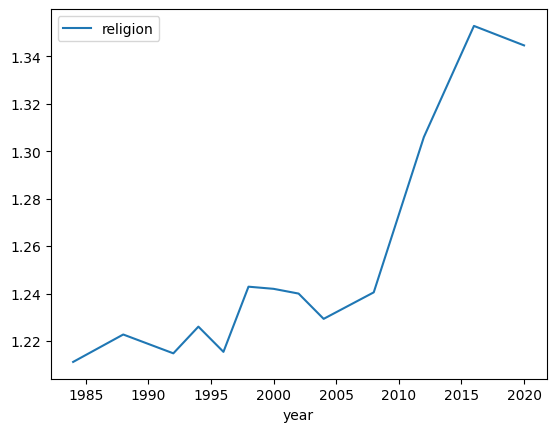

In [23]:
# Now lets look at the trend of religious affiliation over time
# Find average percentage of religious people per year
# line graph (x = year, y = average percentage of religious people)

df4 = df.groupby('year')['religion'].mean().reset_index()
df4.head()
df4.plot(x='year', y='religion', kind='line')

In [24]:
df.head()

,year,ft_lgbt,religion,party_id,religion_cat,party_id_cat
27180,1984,50.0,1.0,1.0,Religious,Republican
27181,1984,40.0,1.0,2.0,Religious,Independent
27182,1984,0.0,1.0,5.0,Religious,Democrat
27183,1984,15.0,1.0,5.0,Religious,Democrat
27184,1984,0.0,1.0,2.0,Religious,Independent


<Axes: xlabel='year', ylabel='ft_lgbt'>

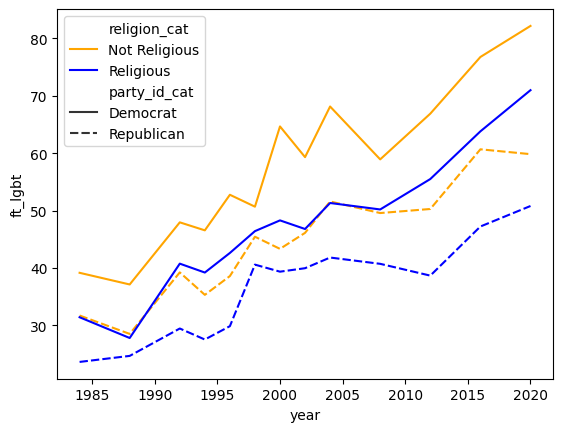

In [25]:
# Ok, now we can get even more specifc and look at religious dems, non-religious dems, religious republicans, non-religious republicans and average lgbt support by year
# line graph (x = year, y = average ft_lgbt)
# 4 lines (religious dems, non-religious dems, religious republicans, non-religious republicans)

df5 = df.groupby(['year', 'religion_cat', 'party_id_cat'])['ft_lgbt'].mean().reset_index()
df5.head()

# filter for only democrats and republicans
df5 = df5[(df5['party_id_cat'] == 'Republican') | (df5['party_id_cat'] == 'Democrat')]
df5.head()

sns.lineplot(x='year', y='ft_lgbt', hue='religion_cat', style='party_id_cat', data=df5, palette=colors)



<Axes: xlabel='year', ylabel='religion'>

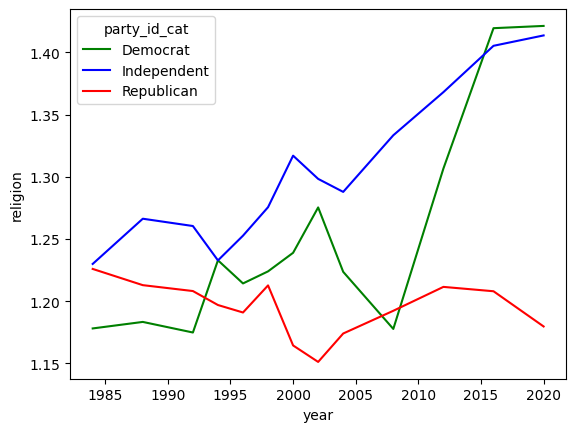

In [27]:
# now I want to make a graph looking at party id over time, only considering dems, republicans, and independents
# line graph (x = year, y = average percentage of religious people)
# 3 lines (democrats, republicans, independents)

df6 = df.groupby(['year', 'party_id_cat'])['religion'].mean().reset_index()
df6.head()

# filter for only democrats, republicans, and independents

df6 = df6[(df6['party_id_cat'] == 'Republican') | (df6['party_id_cat'] == 'Democrat') | (df6['party_id_cat'] == 'Independent')]

df6.head()

# define the colors for each category
colors = {'Republican': 'red', 'Independent': 'blue', 'Democrat': 'green'}

sns.lineplot(x='year', y='religion', hue='party_id_cat', data=df6, palette=colors)
